In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
imdb=pd.read_excel("/content/IMDB Movie Reviews.xlsx")

In [77]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [78]:
imdb['Description'].head()

,Description
0,A group of intergalactic criminals are forced ...
1,"Following clues to the origin of mankind, a te..."
2,Three girls are kidnapped by a man with a diag...
3,"In a city of humanoid animals, a hustling thea..."
4,A secret government agency recruits some of th...


In [79]:
imdb['Revenue (Millions)']=imdb['Revenue (Millions)'].fillna(0)

In [80]:
imdb['Metascore']=imdb['Metascore'].fillna(0)

In [81]:
numcols=imdb[['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore']]

In [82]:
from sklearn.preprocessing import StandardScaler # Scale the data set

In [83]:
numcols_scaled=StandardScaler().fit_transform(numcols)
numcols_scaled

array([[ 0.41634975,  1.45699912,  3.11268996,  2.6008943 ,  0.9441597 ],
       [ 0.57591149,  0.29292371,  1.67495992,  0.53976228,  0.4446043 ],
       [ 0.20360077,  0.61039882, -0.06467572,  0.65604814,  0.30836192],
       ...,
       [-0.80695688, -0.5536766 , -0.52530968, -0.14289358, -0.2366076 ],
       [-1.0728931 , -1.18862683, -0.87416543, -0.72143072, -1.50820316],
       [-1.39201657, -1.50610194, -0.83412689, -0.52555984, -2.00775856]])

In [84]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)
numcols_scaled

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,0.416350,1.456999,3.112690,2.600894,0.944160
1,0.575911,0.292924,1.674960,0.539762,0.444604
2,0.203601,0.610399,-0.064676,0.656048,0.308362
3,-0.275084,0.504574,-0.579129,1.974486,0.172120
4,0.522724,-0.553677,1.186839,2.520013,-0.690749
...,...,...,...,...,...
995,-0.115523,-0.553677,-0.753827,-0.721431,-0.463678
996,-1.019706,-1.294452,-0.512308,-0.546503,-0.418264
997,-0.806957,-0.553677,-0.525310,-0.142894,-0.236608
998,-1.072893,-1.188627,-0.874165,-0.721431,-1.508203


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
tfidf=TfidfVectorizer(max_features=200,stop_words="english")

In [87]:
tfidf_mat=tfidf.fit_transform(imdb['Description'])

In [88]:
tfidf_mat=pd.DataFrame(tfidf_mat.toarray(),columns=tfidf.vocabulary_) # TFIDF Matrix

tfidf_mat.toarray(): The tfidf_mat variable likely holds a sparse matrix, which is efficient for storing data with many zeros. .toarray() converts this sparse matrix into a dense NumPy array.
pd.DataFrame(...): This takes the dense NumPy array and converts it into a Pandas DataFrame. DataFrames are a common and convenient data structure in Python for tabular data analysis.
columns=tfidf.vocabulary_: This part is crucial for making the DataFrame readable. tfidf.vocabulary_ is an attribute of the TfidfVectorizer object (which you previously used to create tfidf_mat). It's a dictionary that maps each word (feature) to its index. By assigning it to the columns parameter, each column in the new DataFrame will be labeled with the corresponding word from the TF-IDF vocabulary.

In [89]:
X=pd.concat([numcols_scaled,tfidf_mat],axis=1) # Matrix

In [90]:
# Most popular clustering method used in Text Data is Hierarchical Clustering
# Hierarchical Clustering groups data into clusters based on similarities
# calculated from distance.
# Output of Hierarchical Clustering is a tree shaped diagram called dendrogram
# Most popular distance method used is Euclidean distance
# Distance Matrix is calculated only once and observations are grouped into
# clusters based on smallest distance

# 2 methods/approaches of Hierarchical Clustering
# a) Agglomerative or Bottom Up Approach - It starts with each data point as its
# own cluster and then iteratively merges most similar pairs of clusters untill
# all data points belong to a single cluster

# b) Divisive of Top Down Approach - It starts with all data points in a single
# cluster and then recursively splits clusters into small sub clusters based on
# dissimilarity

# Linkages is another important concept of hierarchical clustering which refers
# to how distance is calculated between observations of different clusters.
# Linkage methods are single, complete, centroid and most used Ward method.

# Biggest advantage of hierarchical clustering is no need to specify number of
# clusters to be built.  Algorithm automatically finds optimal number of clusters

# K Means is used when more numeric variables in Data and Hierarchical used when
# more number of categorical variables in data


K-Means clustering is primarily designed for numerical variables. Here's why it's generally not suitable for categorical variables and what alternatives you might consider:

Why K-Means is problematic for Categorical Variables:

Distance Calculation: K-Means relies on calculating the 'mean' of cluster centers and Euclidean distance (or similar metrics) to assign data points to clusters. These distance calculations don't have a natural interpretation or effectiveness for categorical data.

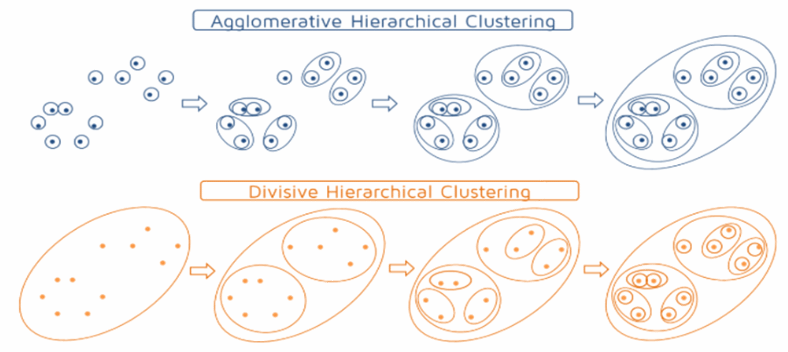

In [91]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import euclidean_distances

In [92]:
imdb_euclidean=euclidean_distances(X)

/tmp/ipython-input-1257838322.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram=sch.dendrogram(sch.linkage(imdb_euclidean,'ward'),


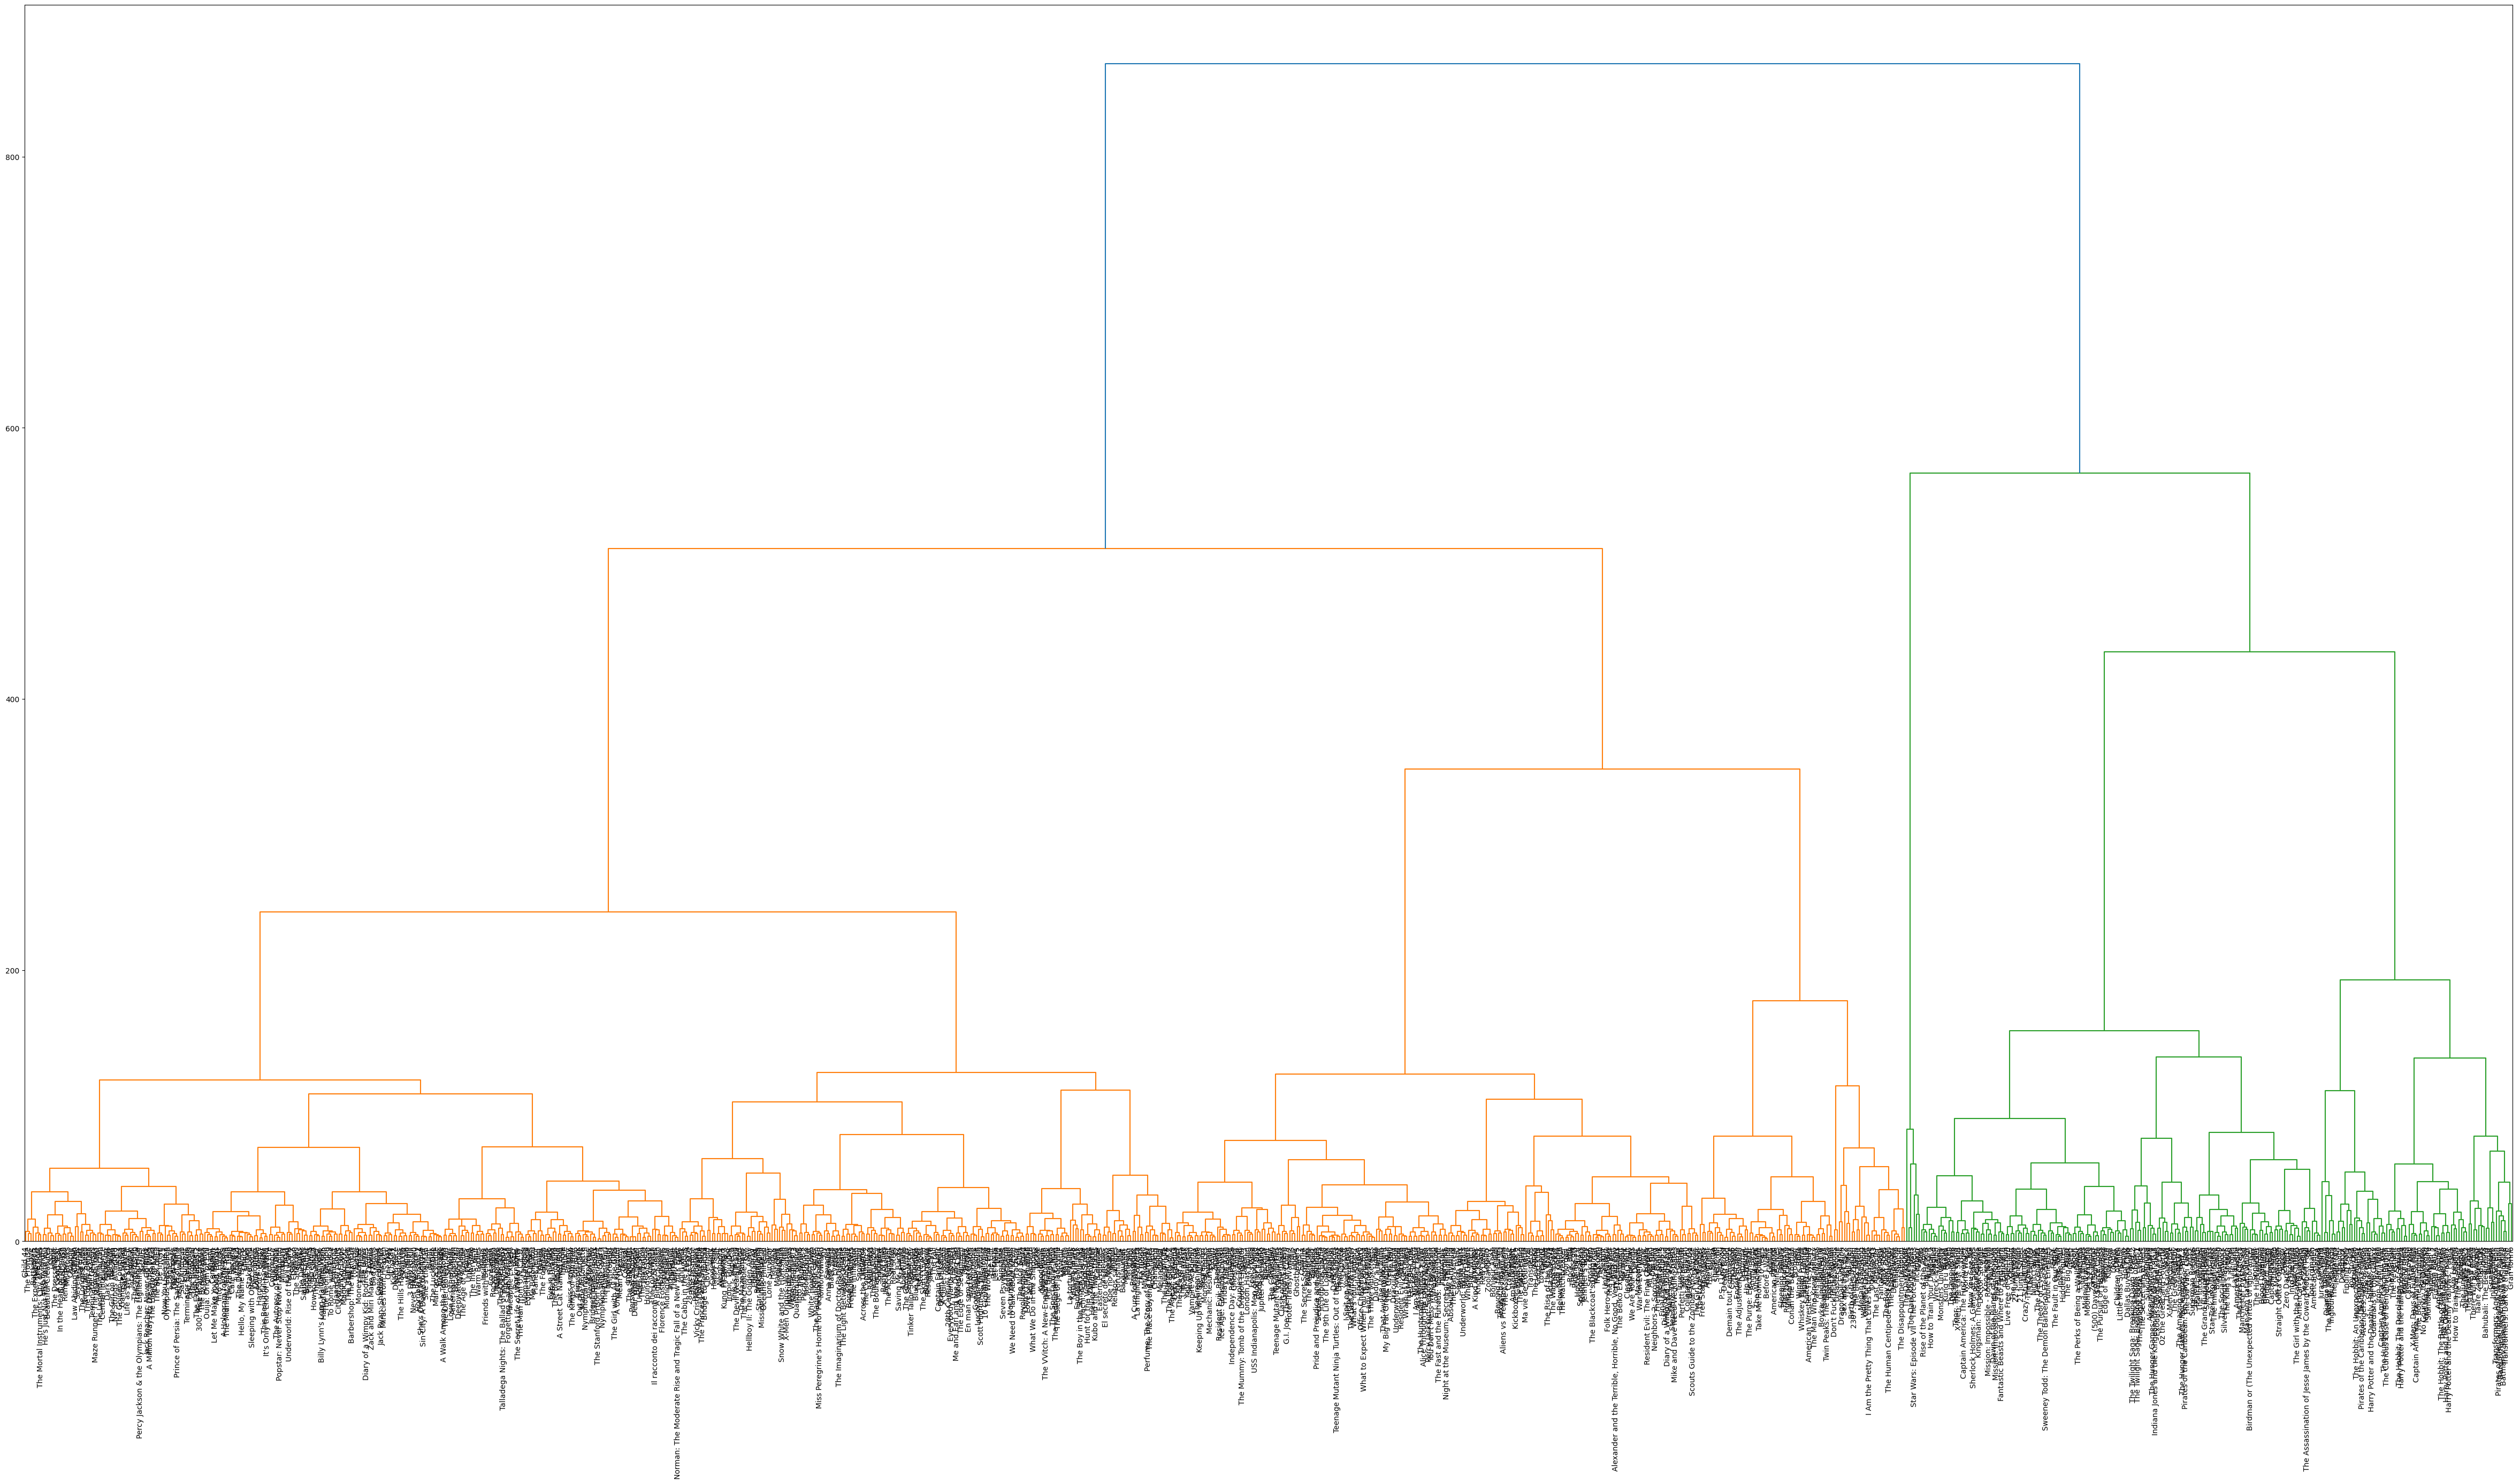

In [93]:
plt.figure(figsize=(60,30))
dendrogram=sch.dendrogram(sch.linkage(imdb_euclidean,'ward'),
                          labels=imdb['Title'].values,leaf_font_size=10) #Dendrogram

In [94]:
from sklearn.cluster import KMeans #KMeans Clustering

In [95]:
wcss=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

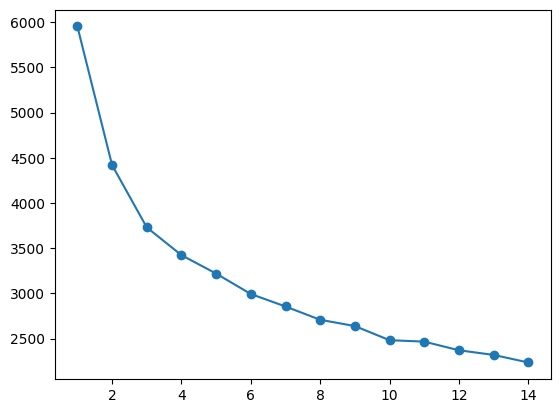

In [96]:
plt.plot(range(1,15),wcss,marker="o")
plt.show() # Elbow Point is 3. Optimal K=3 or n_clusters=3

In [97]:
kmeans_final=KMeans(n_clusters=3).fit(X)

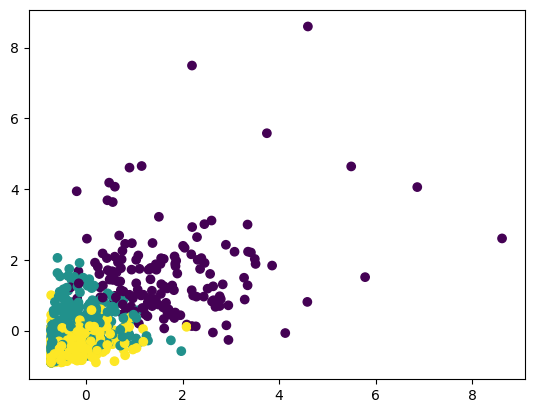

In [98]:
plt.scatter(X['Revenue (Millions)'],X['Votes'],c=kmeans_final.labels_)
plt.show()